In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Correlation approach to clense data
Use pairwise correlation in order to decide which which markets are duplicates then use the one with the longer history. 

In [17]:
cleansed=load_price()

In [18]:
cleansed.count().count()

196

In [21]:
amihud.median().dropna().to_csv('test1.csv')

In [20]:
amihud.median().dropna().count()

131

In [38]:
# This is a cleaner dataset removing duplicates for Amihud. 123 markets
a=pd.read_csv('AmihudMarket.csv').set_index('Market')
cleansed=cleansed[a.index]

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [40]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

Idea:

* Sort portfolios on an annual baisis
* cacluated $\sigma$, $\mu$, skew, max drawdown

In [57]:
number_of_buckets=10
stdev=[]
rtns=[]
mu=[]
for y in range(2000,2016,1):
    year=str(y) + '-12-31'
    s=[]
    s.append(y)
    mu.append(y)
    for i in range(0,number_of_buckets,1):
        mkts=quantile_columns(amihud.resample(rule='a',how='median'),year,number_of_buckets,i)
        mu.append(cleansed.resample(rule='a',how='last')[mkts].pct_change()[str(y+1)].median().median()) 
        s.append(cleansed.resample(rule='m',how='last')[mkts].pct_change()[str(y+1)].std().median()) 
    stdev.append(s)
    rtns.append(mu)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


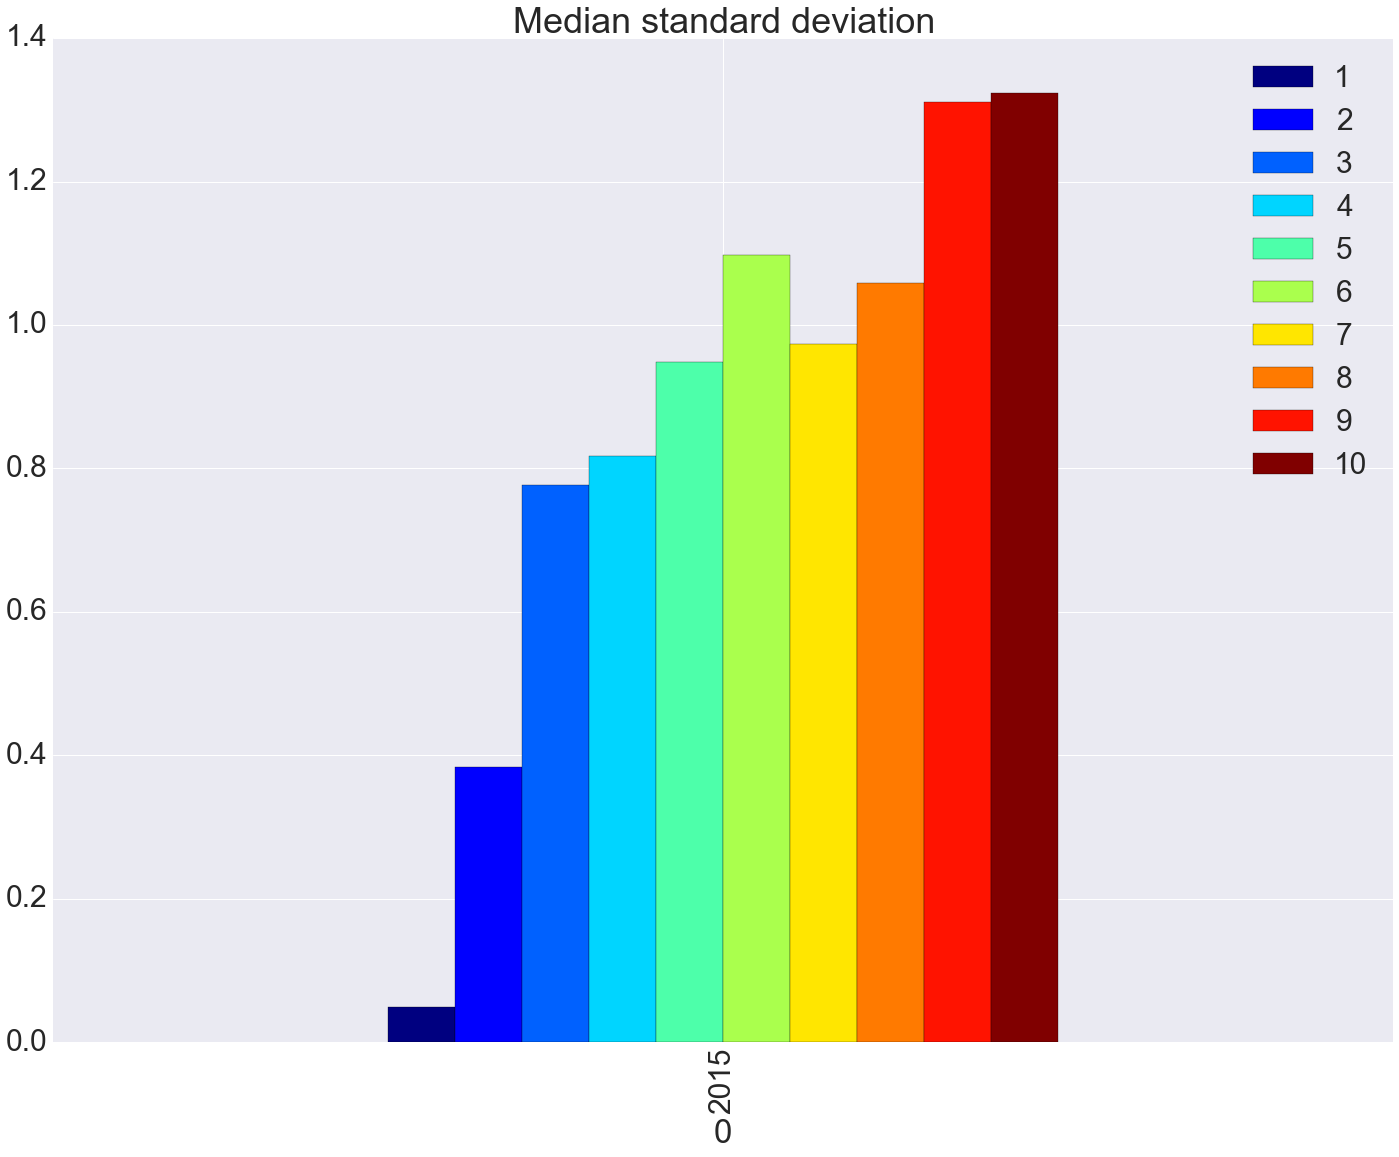

In [59]:
pd.DataFrame(stdev).set_index(0).cumsum().tail(1).plot(colormap='jet',kind='bar',title='Median standard deviation')

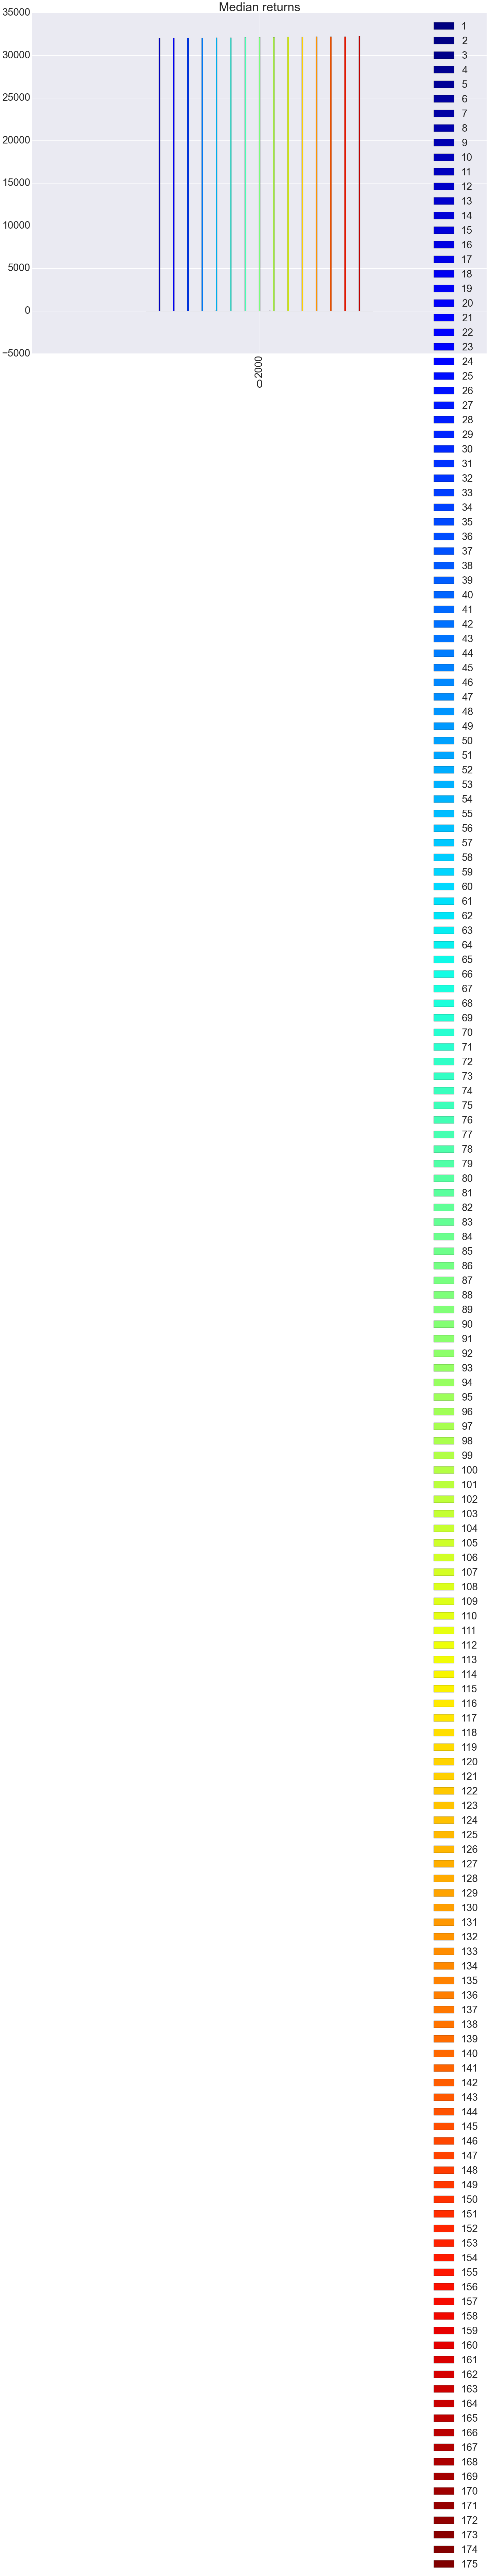

In [60]:
pd.DataFrame(rtns).set_index(0).cumsum().tail(1).plot(colormap='jet',kind='bar',title='Median returns')

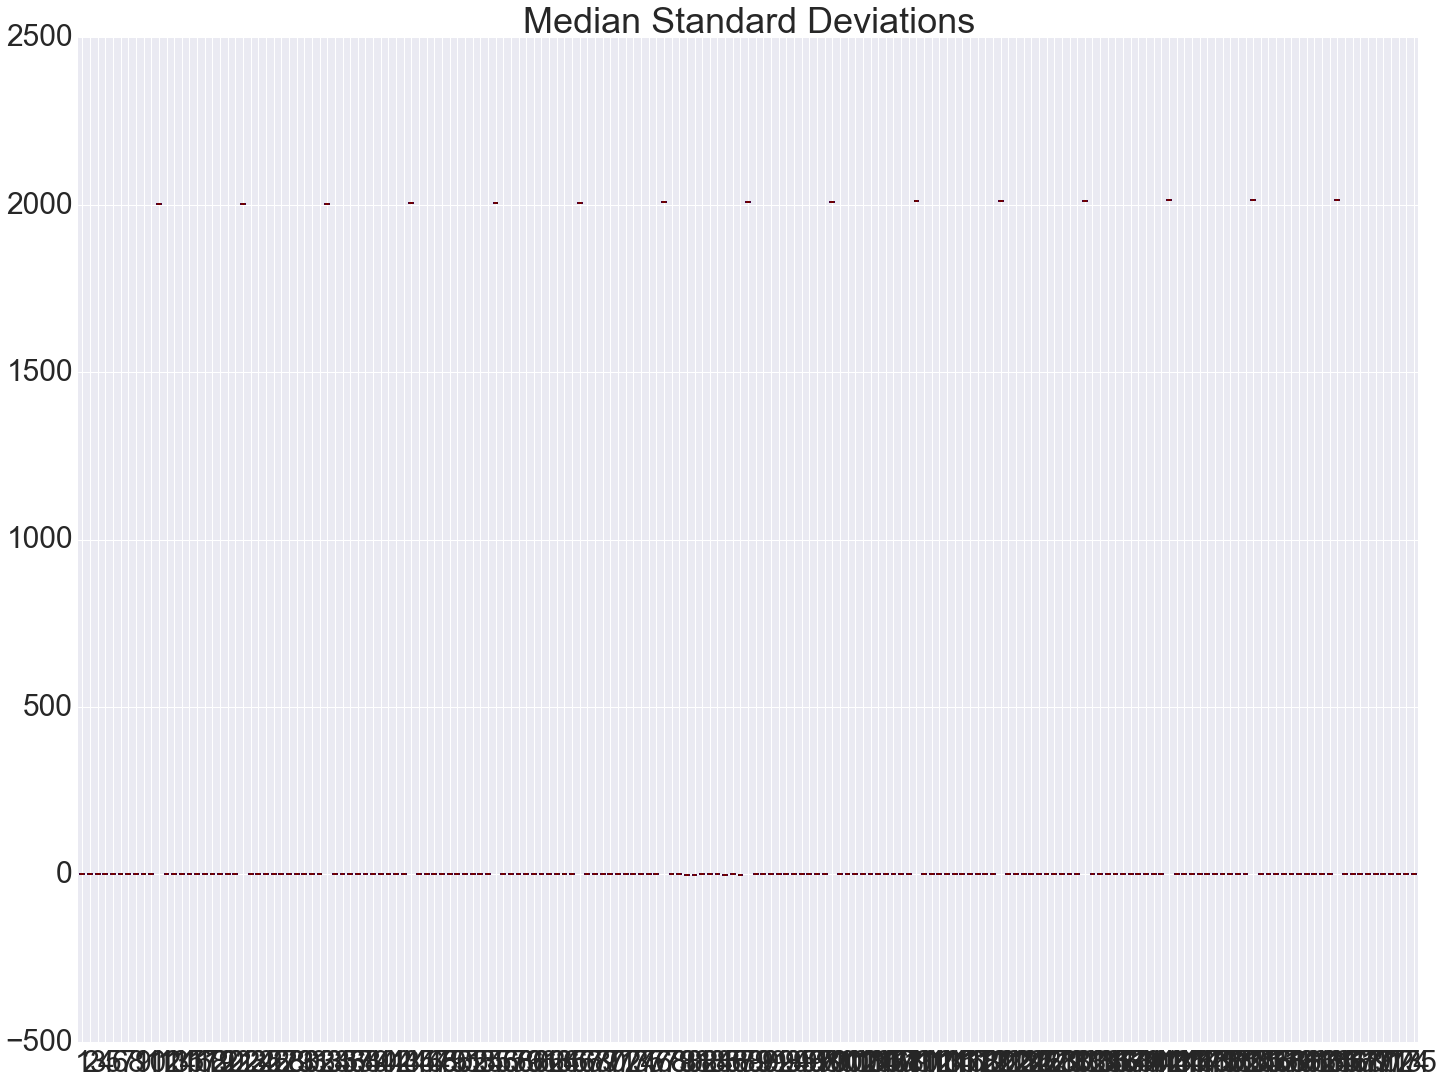

In [61]:
pd.DataFrame(rtns).set_index(0).plot(colormap='jet',kind='box',title='Median Standard Deviations')

* Need to creat panel data and start running regression on that.  